In [2]:
#reference: https://www.askpython.com/python/examples/k-means-clustering-from-scratch
#Loading the required modules
 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 


In [3]:
#Defining our function 
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1: Randomly pick k data points as our initial Centroids
     
    #Step 2: finding the distance between k centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') 
     
    #Step 3: assign each data point to the closest centroid according to the distance found 
    points = np.array([np.argmin(i) for i in distances])
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 
 


In [5]:
#Load Data
data = load_digits().data
pca = PCA(2)

In [6]:
#Transform the data
df = pca.fit_transform(data)


In [7]:
#Applying our function
label = kmeans(df,10,1000)

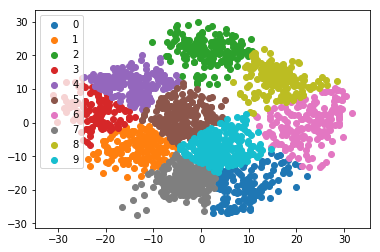

In [8]:
#Visualize the results
 
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()